<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/correlacao_indicadores_economicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots

In [29]:
datainicial = '01/01/2022'
datafinal = '17/06/2024'

# Função para obter os dados da API do Banco Central
def get_bcb_data(series_id, start_date, end_date):
    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{series_id}/dados?formato=json&dataInicial={start_date}&dataFinal={end_date}"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])
    df.set_index('data', inplace=True)
    return df

# Obter os dados da SELIC
selic = get_bcb_data(432, datainicial, datafinal)
selic.columns = ['SELIC']
selic = selic.resample('M').last() #Selecionar o último dado mensal

# Obter os dados da Confiança do Consumidor
confianca_consumidor = get_bcb_data(4393, datainicial, datafinal)
confianca_consumidor.columns = ['CONFIANCA']
confianca_consumidor = confianca_consumidor.resample('M').last() #Selecionar o último dado mensal

# Obter os dados do PIB
pib = get_bcb_data(4380, datainicial, datafinal)
pib.columns = ['PIB']
pib = pib.resample('M').last() #Selecionar o último dado mensal

# Obter os dados do IPCA
ipca = get_bcb_data(13522, datainicial, datafinal)
ipca.columns = ['IPCA']
ipca = ipca.resample('M').last() #Selecionar o último dado mensal

# Obter os dados do INCC
incc = get_bcb_data(192, datainicial, datafinal)
incc.columns = ['INCC']
incc = incc.resample('M').last() #Selecionar o último dado mensal

# Obter os dados do Dólar
dolar = get_bcb_data(10813, datainicial, datafinal)
dolar.columns = ['DOLAR']
dolar = dolar.resample('M').last() #Selecionar o último dado mensal

# Plotar os dados do PIB
fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB', x=pib.index, y=pib['PIB']))
fig.show()


In [30]:
# Juntando os dataframes por coluna
macros = pd.concat([selic, confianca_consumidor, pib, ipca, incc, dolar], axis=1)
macros.tail(30)

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN,5.5799
2022-01-31,9.25,108.35,724702.4,10.38,0.71,5.3568
2022-02-28,10.75,104.05,753050.1,10.54,0.38,5.1388
2022-03-31,11.75,105.12,841775.6,11.30,0.86,4.7372
2022-04-30,11.75,104.35,832503.6,12.13,0.95,4.9185
2022-05-31,12.75,105.87,842025.1,11.73,2.28,4.7283
2022-06-30,13.25,103.60,842952.8,11.89,2.14,5.2374
2022-07-31,13.25,105.58,869493.1,10.07,0.86,5.1878
2022-08-31,13.75,106.76,873761.3,8.73,0.09,5.1784


In [35]:
#Limpando dados vazios
macros.dropna(inplace=True)
macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2022-01-31,9.25,108.35,724702.4,10.38,0.71,5.3568
2022-02-28,10.75,104.05,753050.1,10.54,0.38,5.1388
2022-03-31,11.75,105.12,841775.6,11.30,0.86,4.7372
2022-04-30,11.75,104.35,832503.6,12.13,0.95,4.9185
2022-05-31,12.75,105.87,842025.1,11.73,2.28,4.7283
2022-06-30,13.25,103.60,842952.8,11.89,2.14,5.2374
2022-07-31,13.25,105.58,869493.1,10.07,0.86,5.1878
2022-08-31,13.75,106.76,873761.3,8.73,0.09,5.1784
2022-09-30,13.75,111.46,857927.6,7.17,0.09,5.4060


In [32]:
#Criar uma matriz de correlação

corr_macros = macros.corr()
corr_macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
SELIC,1.000000,0.006061,0.213191,-0.224126,-0.095394,0.066867
CONFIANCA,0.006061,1.000000,0.678377,-0.898480,-0.560192,-0.241457
PIB,0.213191,0.678377,1.000000,-0.709641,-0.325714,-0.314620
IPCA,-0.224126,-0.898480,-0.709641,1.000000,0.662446,0.115420
INCC,-0.095394,-0.560192,-0.325714,0.662446,1.000000,-0.177264
DOLAR,0.066867,-0.241457,-0.314620,0.115420,-0.177264,1.000000


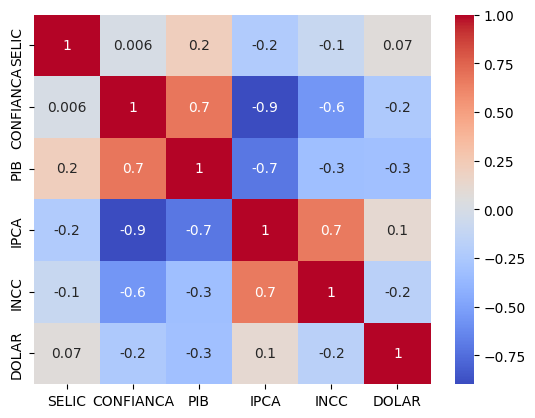

In [36]:
#Construir um heatmap

lista_macros = macros.columns

sns.heatmap(corr_macros,
            cmap='coolwarm',
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

In [34]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='SELIC', x=macros.index, y=macros['SELIC']),row=1, col=1)
fig.add_trace(go.Scatter(name='IPCA', x=macros.index, y=macros['IPCA']),row=1, col=1, secondary_y=False)
fig.update_layout(title_text='SELIC VS IPCA', template='simple_white')
fig.show()

In [21]:
macros['IPCA']

data
2015-01-31    1.24
2015-02-28    1.22
2015-03-31    1.32
2015-04-30    0.71
2015-05-31    0.74
              ... 
2022-08-31   -0.36
2022-09-30   -0.29
2022-10-31    0.59
2022-11-30    0.41
2022-12-31    0.62
Freq: M, Name: IPCA, Length: 96, dtype: float64